In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hddm

In [45]:
data = hddm.load_csv('day1_met.csv')
data = data.rename(columns={'RT':'rt','ACC':'response','user_id':'subj_idx'})

#### Flipped RT Distributions (pos = correct | neg = incorrect)

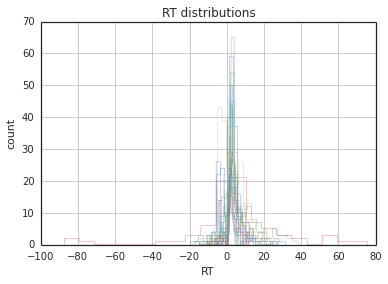

In [33]:
sns.set_style('white')
data = hddm.utils.flip_errors(data) #error RTs are flipped to be negative
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20,histtype='step', ax=ax)

#### Running model across all tasks

In [34]:
m = hddm.HDDM(data)
m.find_starting_values()
m.sample(2000, burn=20)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/optimize/optimize.py:1753: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/optimize/optimize.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


 [-----------------100%-----------------] 2000 of 2000 complete in 127.2 sec

In [36]:
stats = m.gen_stats()

Plotting a
Plotting v
Plotting t


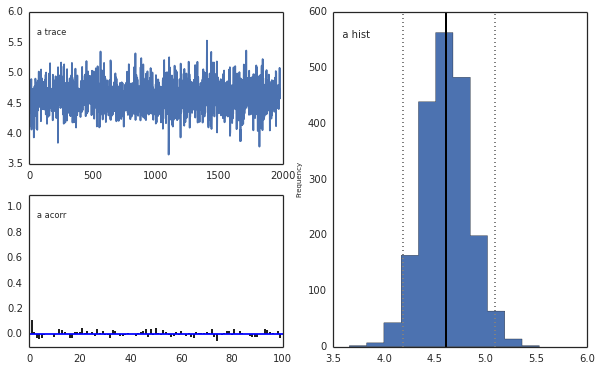

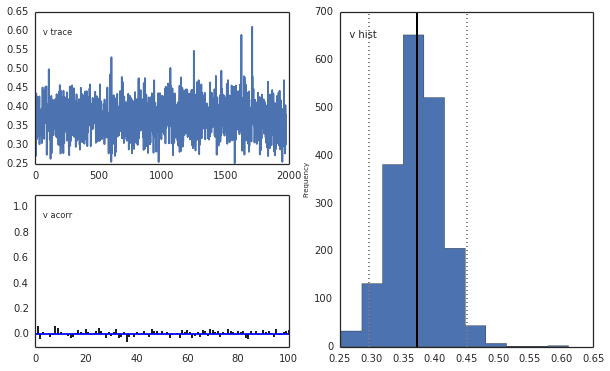

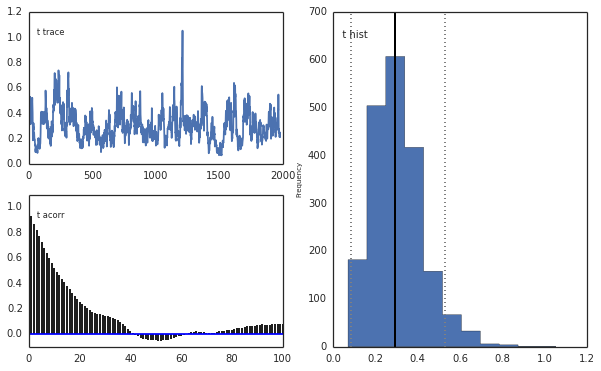

In [37]:
m.plot_posteriors(['a','t','v'])

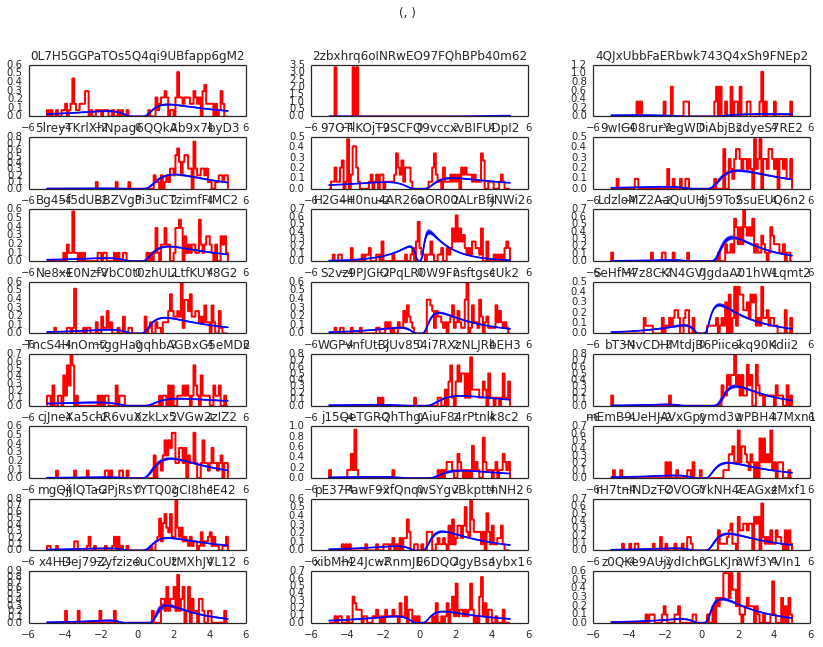

In [38]:
m.plot_posterior_predictive(figsize=(14, 10))

#### Running model that fits different drift rates for each task

In [40]:
# Model with task-specific drift rates
m_stim = hddm.HDDM(data, depends_on={'v': 'exp_id'})
m_stim.find_starting_values()
m_stim.sample(5000, burn=500)

 [-----------------100%-----------------] 5001 of 5000 complete in 959.6 sec

P(timed > untimed) =  0.807777777778
P(timed > VS) =  0.999111111111
P(untimed > VS) =  0.988


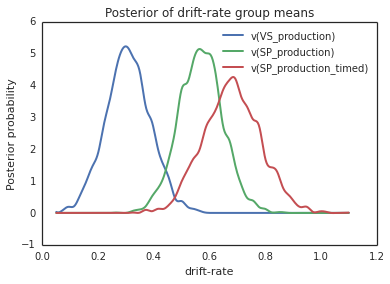

In [41]:
# Production task drift-rate posteriors
v_VS, v_unt, v_tim = m_stim.nodes_db.node[['v(VS_production)',
                                           'v(SP_production)',
                                           'v(SP_production_timed)']]
hddm.analyze.plot_posterior_nodes([v_VS, v_unt, v_tim])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

print "P(timed > untimed) = ", (v_tim.trace() > v_unt.trace()).mean()
print "P(timed > VS) = ", (v_tim.trace() > v_VS.trace()).mean()
print "P(untimed > VS) = ", (v_unt.trace() > v_VS.trace()).mean()

P(timed > untimed) =  0.890222222222
P(timed > VS) =  0.939111111111
P(untimed > VS) =  0.656666666667


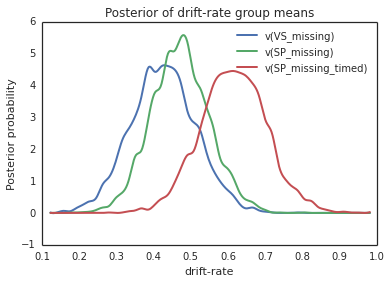

In [42]:
# Missing Addend task drift-rate posteriors
v_VS, v_unt, v_tim = m_stim.nodes_db.node[['v(VS_missing)',
                                           'v(SP_missing)',
                                           'v(SP_missing_timed)']]
hddm.analyze.plot_posterior_nodes([v_VS, v_unt, v_tim])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

print "P(timed > untimed) = ", (v_tim.trace() > v_unt.trace()).mean()
print "P(timed > VS) = ", (v_tim.trace() > v_VS.trace()).mean()
print "P(untimed > VS) = ", (v_unt.trace() > v_VS.trace()).mean()

P(timed > untimed) =  0.981111111111
P(timed > VS) =  1.0
P(untimed > VS) =  0.994888888889


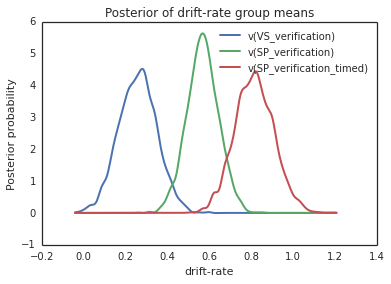

In [47]:
# Verification task drift-rate posteriors
v_VS, v_unt, v_tim = m_stim.nodes_db.node[['v(VS_verification)',
                                           'v(SP_verification)',
                                           'v(SP_verification_timed)']]
hddm.analyze.plot_posterior_nodes([v_VS, v_unt, v_tim])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

print "P(timed > untimed) = ", (v_tim.trace() > v_unt.trace()).mean()
print "P(timed > VS) = ", (v_tim.trace() > v_VS.trace()).mean()
print "P(untimed > VS) = ", (v_unt.trace() > v_VS.trace()).mean()